# Phần 5: Mô tả dữ liệu và khảo sát dạng phân phối


# 1. Hãy mô tả và khảo sát phân phối cho biến T1


Trung bình (Mean): 5.95
Trung vị (Median): 5.85
Độ lệch chuẩn (Std): 1.61
Phương sai (Variance): 2.59
Min: 2.4, Q1: 5.00, Median: 5.85, Q3: 7.20, Max: 9.3
IQR (Khoảng tứ phân vị): 2.20


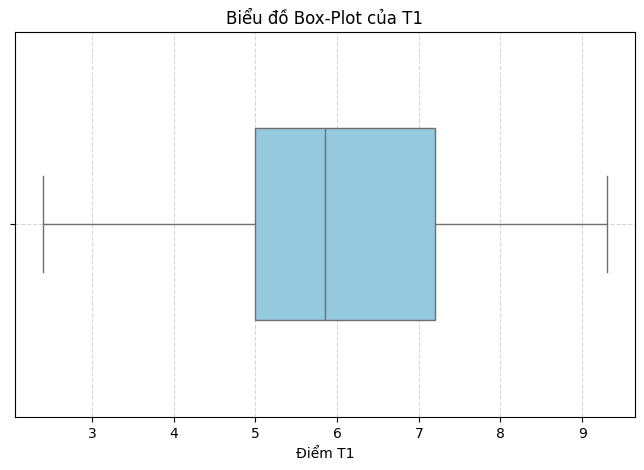

Phân phối lệch phải (Skewed Right)


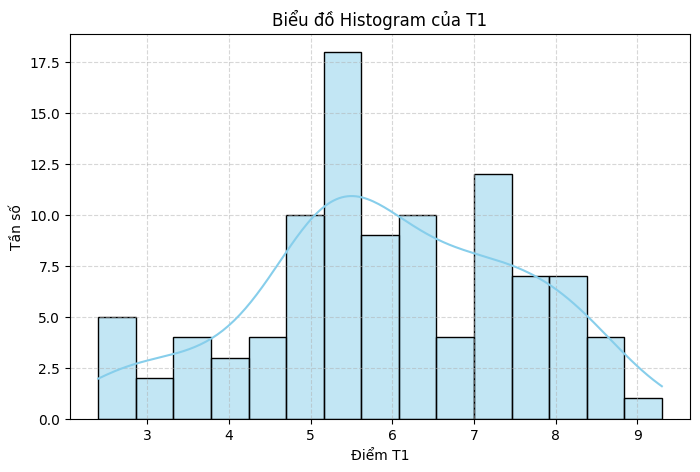

Độ lệch (Skewness): -0.18
Độ nhọn (Kurtosis): -0.52
Phân phối lệch trái (Skewed Left)
Phân phối thoải (Platykurtic)


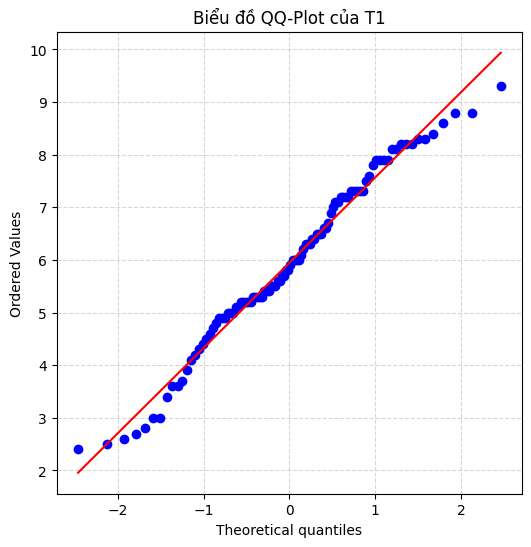

Nhận xét:
- Biểu đồ Box-Plot cho thấy khoảng phân tán của dữ liệu.
- Histogram có dạng hình chuông nhưng có thể có độ lệch.
- Giá trị Skewness và Kurtosis giúp đánh giá mức độ lệch và nhọn.
- QQ-Plot cho thấy liệu dữ liệu có phân phối chuẩn hay không.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df = df.dropna(subset=["T1"])

mean_T1 = df["T1"].mean()
median_T1 = df["T1"].median()
std_T1 = df["T1"].std()
var_T1 = df["T1"].var()
min_T1 = df["T1"].min()
max_T1 = df["T1"].max()
q1_T1 = df["T1"].quantile(0.25)
q3_T1 = df["T1"].quantile(0.75)
iqr_T1 = q3_T1 - q1_T1

print(f"Trung bình (Mean): {mean_T1:.2f}")
print(f"Trung vị (Median): {median_T1:.2f}")
print(f"Độ lệch chuẩn (Std): {std_T1:.2f}")
print(f"Phương sai (Variance): {var_T1:.2f}")
print(f"Min: {min_T1}, Q1: {q1_T1:.2f}, Median: {median_T1:.2f}, Q3: {q3_T1:.2f}, Max: {max_T1}")
print(f"IQR (Khoảng tứ phân vị): {iqr_T1:.2f}")

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["T1"], color="skyblue", width=0.5)
plt.xlabel("Điểm T1")
plt.title("Biểu đồ Box-Plot của T1")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

if mean_T1 > median_T1:
    print("Phân phối lệch phải (Skewed Right)")
elif mean_T1 < median_T1:
    print("Phân phối lệch trái (Skewed Left)")
else:
    print("Phân phối đối xứng")

plt.figure(figsize=(8, 5))
sns.histplot(df["T1"], bins=15, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Điểm T1")
plt.ylabel("Tần số")
plt.title("Biểu đồ Histogram của T1")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

skewness_T1 = stats.skew(df["T1"])
kurtosis_T1 = stats.kurtosis(df["T1"])

print(f"Độ lệch (Skewness): {skewness_T1:.2f}")
print(f"Độ nhọn (Kurtosis): {kurtosis_T1:.2f}")

if skewness_T1 > 0:
    print("Phân phối lệch phải (Skewed Right)")
elif skewness_T1 < 0:
    print("Phân phối lệch trái (Skewed Left)")
else:
    print("Phân phối đối xứng")

if kurtosis_T1 > 0:
    print("Phân phối nhọn (Leptokurtic)")
elif kurtosis_T1 < 0:
    print("Phân phối thoải (Platykurtic)")
else:
    print("Phân phối chuẩn (Mesokurtic)")

plt.figure(figsize=(6, 6))
stats.probplot(df["T1"], dist="norm", plot=plt)
plt.title("Biểu đồ QQ-Plot của T1")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

print("Nhận xét:")
print("- Biểu đồ Box-Plot cho thấy khoảng phân tán của dữ liệu.")
print("- Histogram có dạng hình chuông nhưng có thể có độ lệch.")
print("- Giá trị Skewness và Kurtosis giúp đánh giá mức độ lệch và nhọn.")
print("- QQ-Plot cho thấy liệu dữ liệu có phân phối chuẩn")


# 2. Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)


C:\Users\84936\AppData\Local\Temp\ipykernel_25252\2254889640.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="phanlopT1", y="T1", data=df, order=["k", "tb", "kh", "g"], palette={"k": "green", "tb": "purple", "kh": "yellow", "g": "blue"})


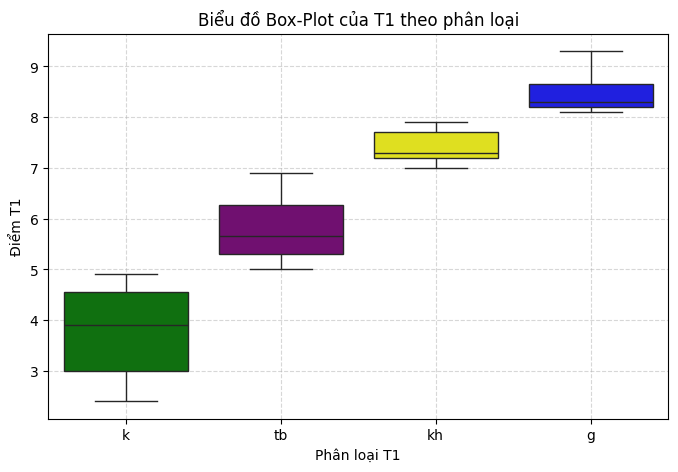

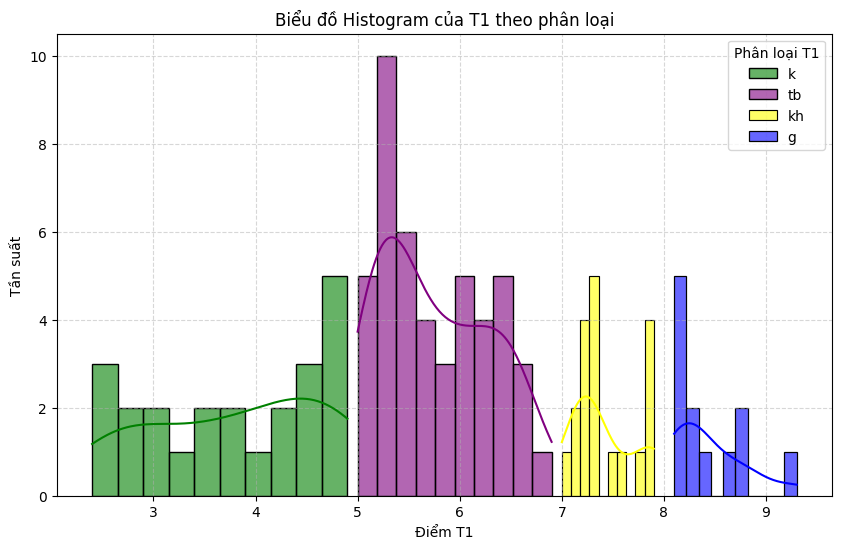

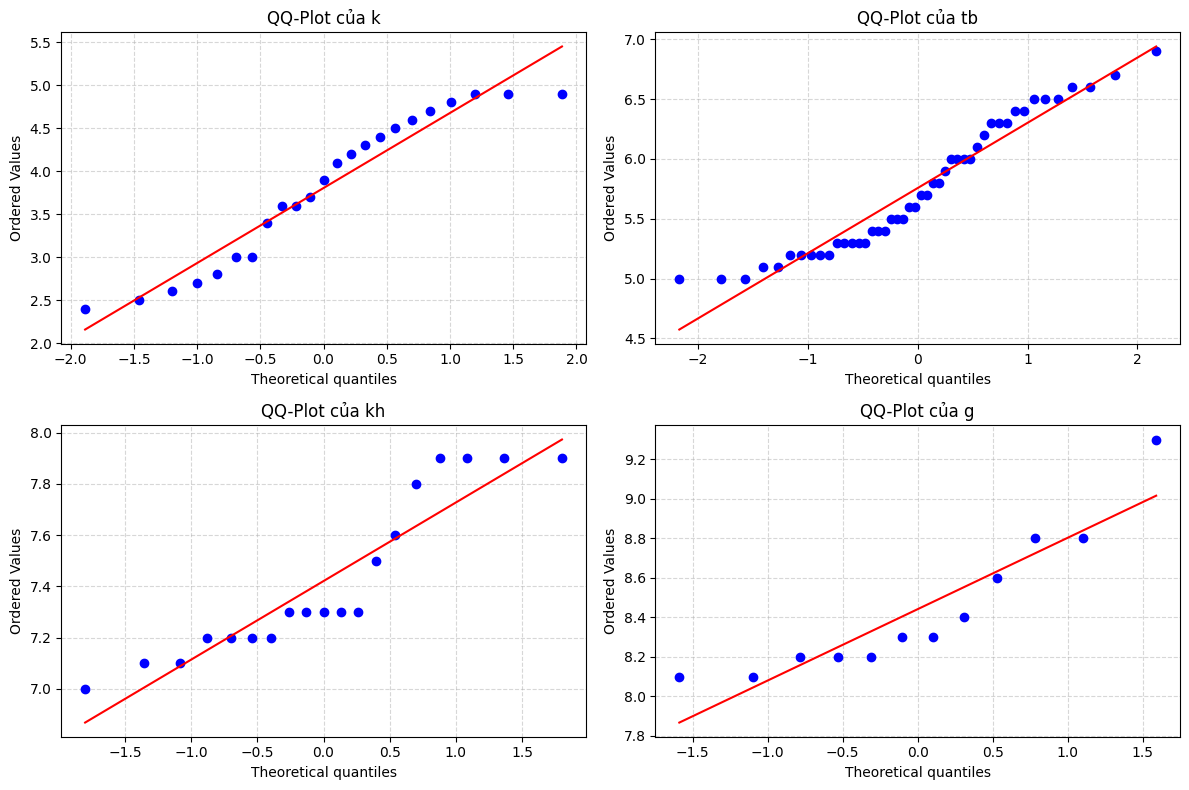

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df = df.dropna(subset=["T1"])
def classify_T1(score):
    if score < 5:
        return "k"
    elif 5 <= score < 7:
        return "tb"
    elif 7 <= score < 8:
        return "kh"
    else:
        return "g"

df["phanlopT1"] = df["T1"].apply(classify_T1)

plt.figure(figsize=(8, 5))
sns.boxplot(x="phanlopT1", y="T1", data=df, order=["k", "tb", "kh", "g"], palette={"k": "green", "tb": "purple", "kh": "yellow", "g": "blue"})
plt.xlabel("Phân loại T1")
plt.ylabel("Điểm T1")
plt.title("Biểu đồ Box-Plot của T1 theo phân loại")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
for category, color in zip(["k", "tb", "kh", "g"], ["green", "purple", "yellow", "blue"]):
    sns.histplot(df[df["phanlopT1"] == category]["T1"], bins=10, kde=True, color=color, label=category, alpha=0.6)
plt.xlabel("Điểm T1")
plt.ylabel("Tần suất")
plt.title("Biểu đồ Histogram của T1 theo phân loại")
plt.legend(title="Phân loại T1")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(12, 8))
for i, category in enumerate(["k", "tb", "kh", "g"], 1):
    plt.subplot(2, 2, i)
    stats.probplot(df[df["phanlopT1"] == category]["T1"], dist="norm", plot=plt)
    plt.title(f"QQ-Plot của {category}")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# 3. Hãy khảo sát tương quan giữa biến DH1 theo biến T1

Covariance giữa DH1 và T1: 0.11
Correlation giữa DH1 và T1: 0.05


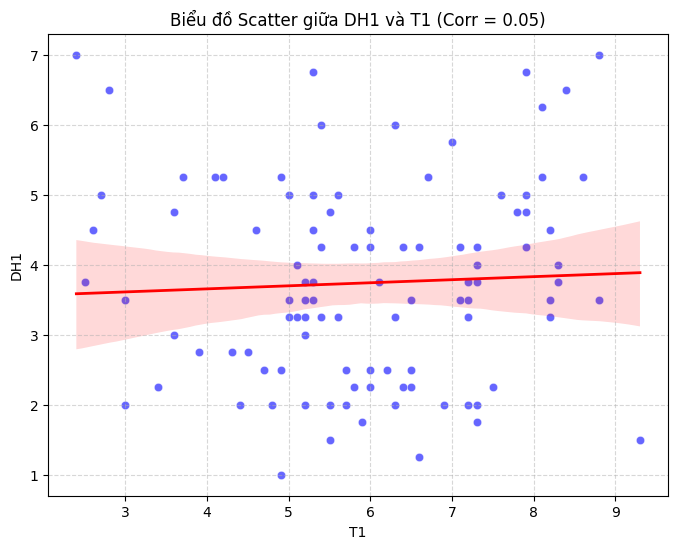

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df = df.dropna(subset=["DH1", "T1"])

cov_value = np.cov(df["T1"], df["DH1"])[0, 1]
corr_value = np.corrcoef(df["T1"], df["DH1"])[0, 1]

print(f"Covariance giữa DH1 và T1: {cov_value:.2f}")
print(f"Correlation giữa DH1 và T1: {corr_value:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["T1"], y=df["DH1"], color="blue", alpha=0.6)
plt.xlabel("Điểm Toán (T1)")
plt.ylabel("Điểm Đại Học (DH1)")
plt.title(f"Biểu đồ Scatter giữa DH1 và T1 (Corr = {corr_value:.2f})")
plt.grid(True, linestyle="--", alpha=0.5)

sns.regplot(x=df["T1"], y=df["DH1"], scatter=False, color="red", line_kws={"linewidth": 2})

plt.show()


# 4. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực


Covariance & Correlation giữa DH1 và T1 trên từng khu vực:
Khu vực 2NT: Covariance = 0.51, Correlation = 0.28
Khu vực 1: Covariance = -0.18, Correlation = -0.08
Khu vực 2: Covariance = 0.16, Correlation = 0.06


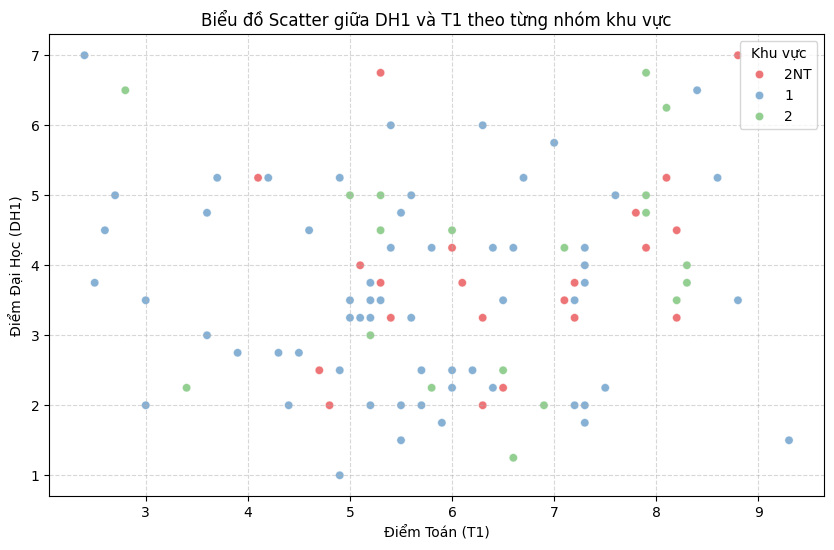

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df = df.dropna(subset=["DH1", "T1", "KV"])

df["KV"] = df["KV"].astype(str)

print("Covariance & Correlation giữa DH1 và T1 trên từng khu vực:")
for kv in df["KV"].unique():
    df_kv = df[df["KV"] == kv]
    cov_value = np.cov(df_kv["T1"], df_kv["DH1"])[0, 1]
    corr_value = np.corrcoef(df_kv["T1"], df_kv["DH1"])[0, 1]
    print(f"Khu vực {kv}: Covariance = {cov_value:.2f}, Correlation = {corr_value:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["T1"], y=df["DH1"], hue=df["KV"], alpha=0.6, palette="Set1")
plt.xlabel("Điểm Toán (T1)")
plt.ylabel("Điểm Đại Học (DH1)")
plt.title("Biểu đồ Scatter giữa DH1 và T1 theo từng nhóm khu vực")
plt.legend(title="Khu vực")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# 5. Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3
 

Ma trận hiệp phương sai (Covariance Matrix):
          DH1       DH2       DH3
DH1  2.028939  0.053081  0.027778
DH2  0.053081  1.123712 -0.101010
DH3  0.027778 -0.101010  1.083965

Ma trận tương quan (Correlation Matrix):
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


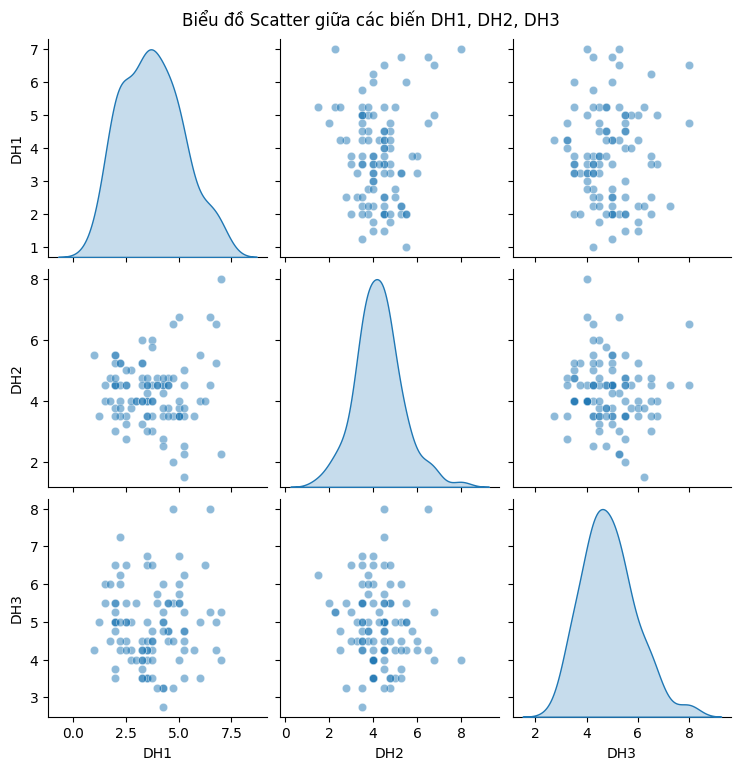

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")
df = df.dropna(subset=["DH1", "DH2", "DH3"])
cov_matrix = df[["DH1", "DH2", "DH3"]].cov()
corr_matrix = df[["DH1", "DH2", "DH3"]].corr()

print("Ma trận hiệp phương sai (Covariance Matrix):")
print(cov_matrix)

print("\nMa trận tương quan (Correlation Matrix):")
print(corr_matrix)

sns.pairplot(df[["DH1", "DH2", "DH3"]], diag_kind="kde", markers="o", plot_kws={"alpha": 0.5})
plt.suptitle("Biểu đồ Scatter giữa các biến DH1, DH2, DH3", y=1.02)
plt.show()
